In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [2]:
path = "tetris_blocks.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

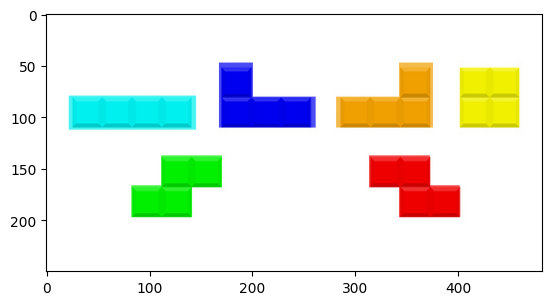

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale:

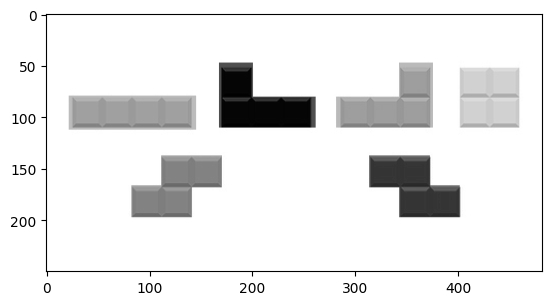

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

# Advanced processing
Apply edge detection, so we can find the outlines of objects in images:


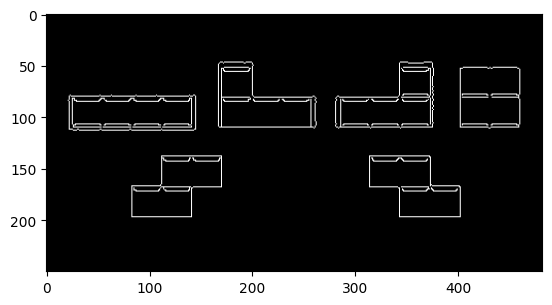

In [5]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values equal to or less than 225 to 255 (white; foreground): $x \le 225 \rightarrow x = 255$ and all pixel values greater than 225 to 0 (black; background): $x \gt 225 \rightarrow x=0$

Thereby we are segmenting the image.

Both the threshold (e.g. 225 in our case) and the value for pixels less than the threshold in the resulting image (255 in our case) can be tweaked.

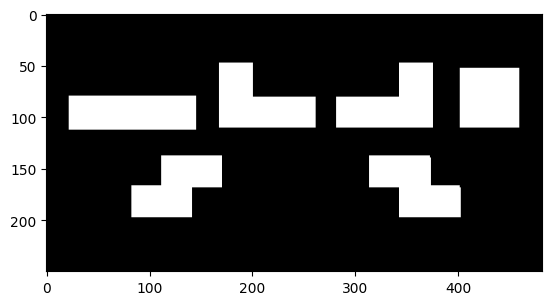

In [6]:
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image:

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours:

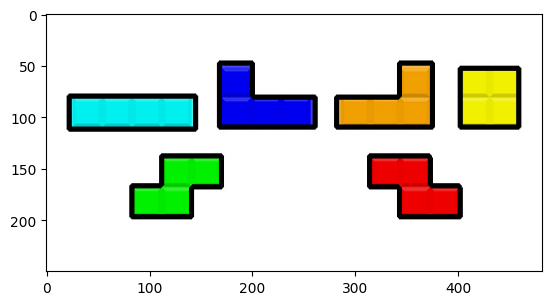

In [8]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple:

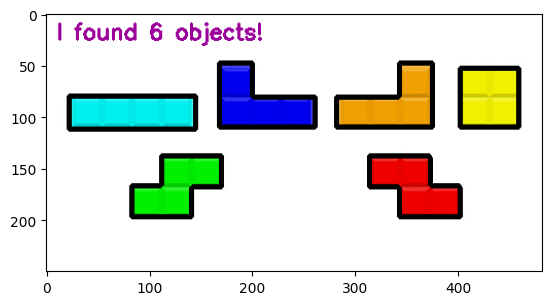

In [9]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects:

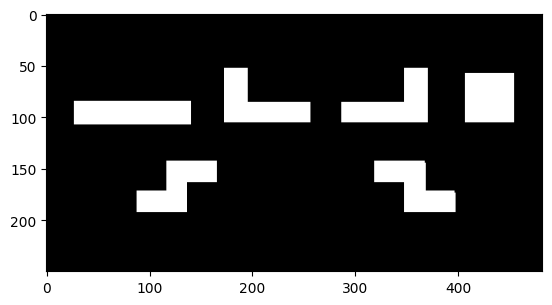

In [10]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects:

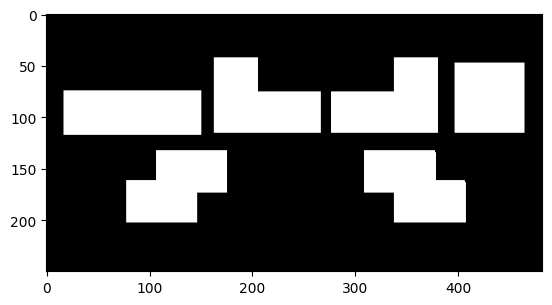

In [11]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise `AND` to our input image, keeping only the masked regions:

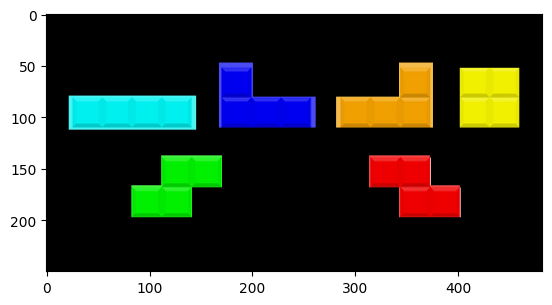

In [12]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Exercise 2
1. Can you remove the yellow square from the image?
2. Go through the tutoria, but with the `spheres.png` image. (replace `tetris_blocks.png` with `spheres.png`)
3. Tweak the parameters of the thresholding. Can you threshold all the spheres?
4. Can you remove the red sphere?
5. Can you remove the green sphere?

## Remove the yellow square

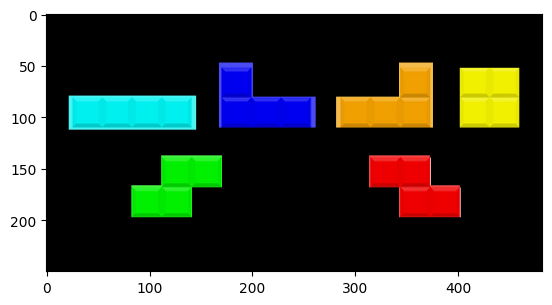

In [13]:
# Assign the masked image to a new variable
masked = output.copy()

# Display the masked image
plt.imshow(masked)
plt.show()

R: 241, G: 240, B: 0


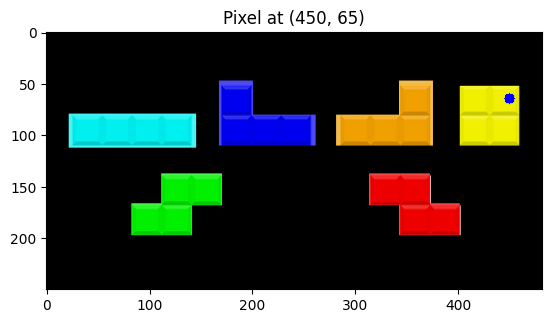

In [14]:
# Find the color of a specific pixel
(r, g, b) = masked[75, 450]

# Print the color of the pixel
print("R: {}, G: {}, B: {}".format(r, g, b))

# Create a copy of the original image and draw a circle around the pixel we're going to sample
output = masked.copy()
cv2.circle(output, (450, 65), 5, (0, 0, 255), -1)

# Display the output image
plt.imshow(output)
plt.title("Pixel at (450, 65)")
plt.show()

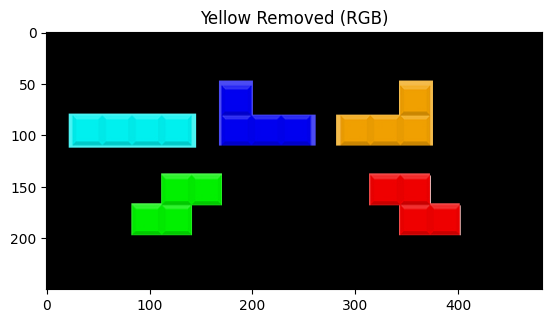

In [15]:
# Define the lower and upper bounds for a darker yellow in RGB
lower_yellow = np.array([190, 190, 0])  # Darker yellow, lower R and G
upper_yellow = np.array([255, 255, 150])  # Upper limit for yellow (less blue)

# Create a mask for the yellow color in the RGB space
yellow_mask = cv2.inRange(masked, lower_yellow, upper_yellow)

# Invert the mask to keep everything except yellow
yellow_removed = cv2.bitwise_and(masked, masked, mask=cv2.bitwise_not(yellow_mask))

# Display the image with the darker yellow removed
plt.imshow(yellow_removed)
plt.title("Yellow Removed (RGB)")
plt.show()

## Spheres images

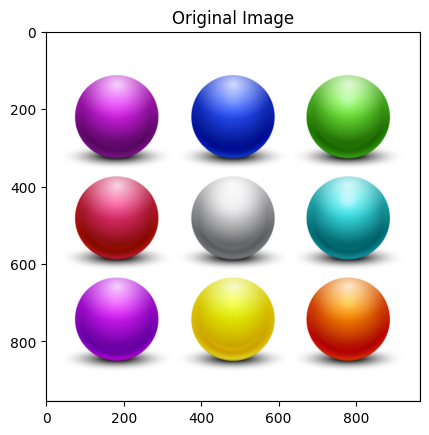

In [16]:
path = "spheres.png"

bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)
plt.title("Original Image")
plt.show()

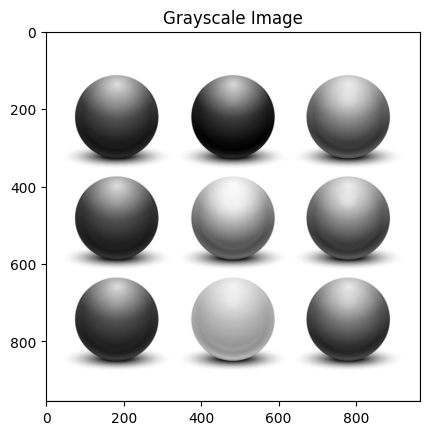

In [17]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

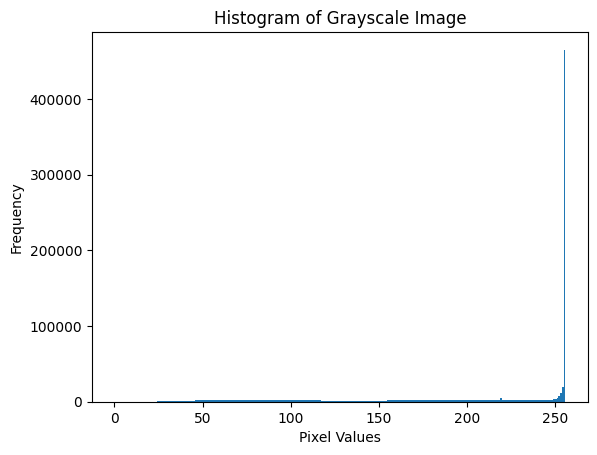

In [18]:
# Plot the histogram of the grayscale image
plt.hist(gray.ravel(), 256, [0, 256])
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show()

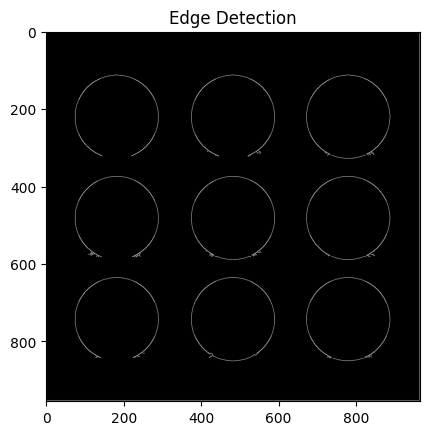

In [19]:
# Edge detection
edged = cv2.Canny(gray, 50, 150)
plt.imshow(edged, cmap='gray')
plt.title("Edge Detection")
plt.show()

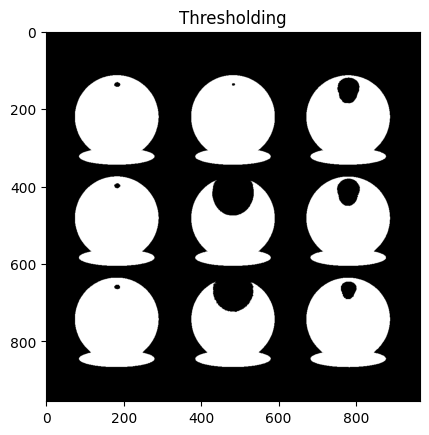

In [20]:
# Adjust thresholding
threshold = 215
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')
plt.title("Thresholding")
plt.show()

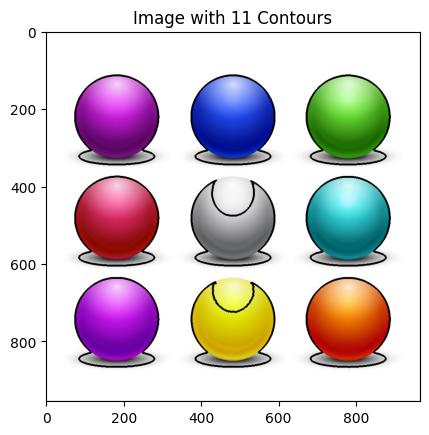

In [21]:
# Find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Print the number of contours found
num_objects = len(cnts)

# Create a copy of the original image and draw contours
image_copy = image.copy()
for c in cnts:
    cv2.drawContours(image_copy, [c], -1, (0, 0, 0), 3)
    
plt.imshow(image_copy)
plt.title(f"Image with {num_objects} Contours")
plt.show()

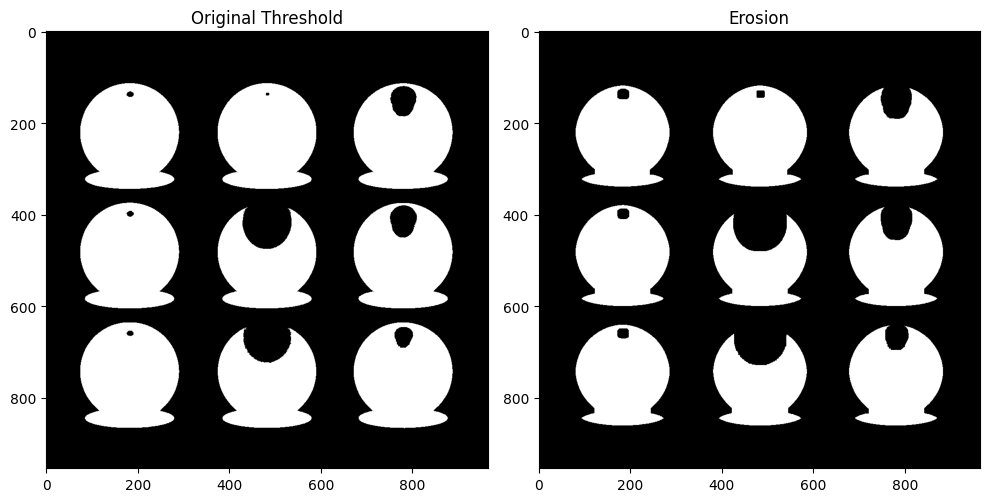

In [22]:
# Apply erosion to the thresholded image
erosion = cv2.erode(thresh, None, iterations=5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original threshold
ax1.imshow(thresh, cmap='gray')
ax1.set_title("Original Threshold")

# Plot the erosion
ax2.imshow(erosion, cmap='gray')
ax2.set_title("Erosion")

plt.tight_layout()
plt.show()

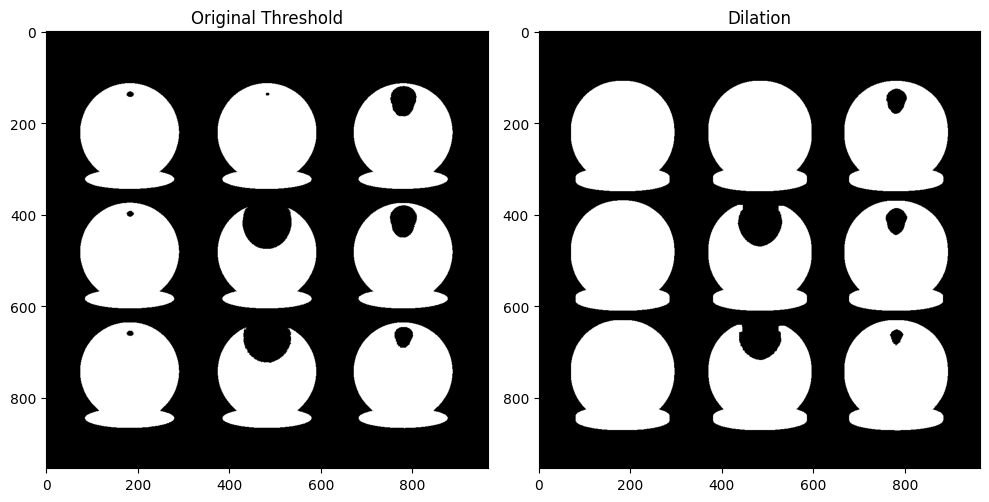

In [23]:
# Apply dilation to the thresholded image
dilation = cv2.dilate(thresh, None, iterations=5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original threshold
ax1.imshow(thresh, cmap='gray')
ax1.set_title("Original Threshold")

# Plot the dilation
ax2.imshow(dilation, cmap='gray')
ax2.set_title("Dilation")

plt.tight_layout()
plt.show()


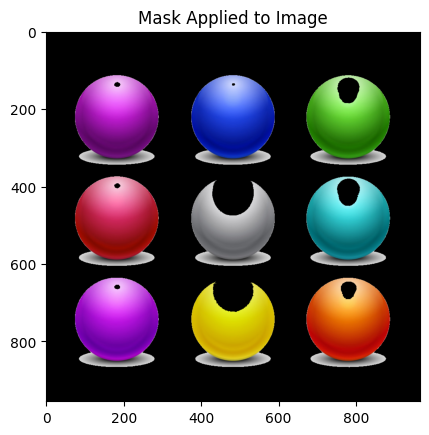

In [24]:
# Apply the mask to the original image
output = cv2.bitwise_and(image, image, mask=thresh)
plt.imshow(output)
plt.title("Mask Applied to Image")
plt.show()

## Remove the red sphere

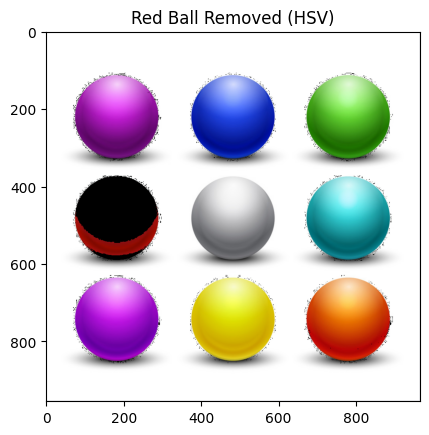

In [25]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Define the lower and upper bounds for the red color in HSV
lower_red_hsv = np.array([150, 0, 0])
upper_red_hsv = np.array([180, 255, 255])

# Create a mask for the red color in the HSV space
red_mask_hsv = cv2.inRange(hsv_image, lower_red_hsv, upper_red_hsv)

# Invert the mask to keep everything except red
red_removed_hsv = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(red_mask_hsv))

# Display the image with the red ball removed (HSV)
plt.imshow(red_removed_hsv)
plt.title("Red Ball Removed (HSV)")
plt.show()

# Remove the green sphere

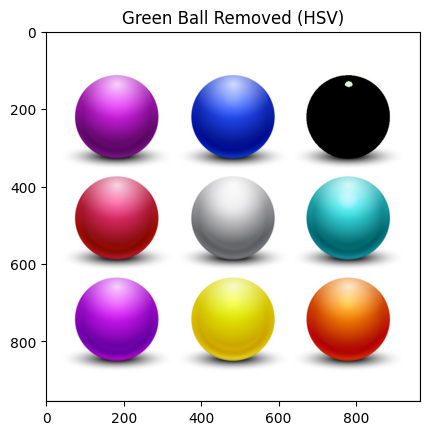

In [26]:
# Define the lower and upper bounds for the green color in HSV
lower_green_hsv = np.array([35, 50, 50])
upper_green_hsv = np.array([85, 255, 255])

# Create a mask for the green color in the HSV space
green_mask_hsv = cv2.inRange(hsv_image, lower_green_hsv, upper_green_hsv)

# Invert the mask to keep everything except green
green_removed_hsv = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(green_mask_hsv))

# Display the image with the green ball removed (HSV)
plt.imshow(green_removed_hsv)
plt.title("Green Ball Removed (HSV)")
plt.show()